In [ ]:
import requests
import json
uuid = []
tags_name = []
output = list()
url = 'https://ganj.irandoc.ac.ir/api/v1/search/advance?basicscope_1=1&basicscope_2=1&basicscope_3=1&fulltext_status=1&keywords_1=%D8%AF%D8%A7%D9%86%D8%B4%DA%AF%D8%A7%D9%87%20%D8%AA%D8%B1%D8%A8%DB%8C%D8%AA%20%D9%85%D8%AF%D8%B1%D8%B3&keywords_2=%D9%85%D8%AD%D9%85%D8%AF%20%D8%A7%D9%82%D8%AF%D8%B3%DB%8C&keywords_3=&limitation=&operator_1=1&operator_2=1&results_per_page=4&sort_by=1&year_from=0&year_to=1399'
response = requests.get(url)
results = json.loads(response.text)
for d in results['results']:
                 response = requests.get(f'https://ganj.irandoc.ac.ir/api/v1/articles/{d["uuid"]}/show_tags')
                 result = json.loads(response.text)
                 uuid.append(d["uuid"])
                 output.append({"title": d["title"], "tags": [t["title_fa"] for t in result["tags"]]})
for i in output:
             tags_name.append(i['tags'])

In [ ]:
 matrix = [[int(tt in d["tags"]) for tt in tags_name] for d in output]
print(matrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
import numpy as np
arr1 = np.array(matrix)
transpose = arr1.transpose()
print(f'Transposed Array:\n{transpose}')

Transposed Array:
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
P = np.dot(matrix,transpose)

In [ ]:
P[0][3]=1
P[3][4]=1
P[5][1]=1
P[9][2]=1
P[10][6]=1
P[7][2]=1
P[9][2]=1
P[9][0]=1
P[10][2]=1
P[10][4]=1
P[10][6]=1

In [ ]:
P

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]])

In [ ]:
def get_edges_from_list(l):
    edges = []
    for i,x in enumerate(l[:-1]):
        edges.append((x, l[i+1]))

    return edges


In [ ]:
arr = set(sum([get_edges_from_list(x['tags']) for x in output], []))
edges= [(d.get('title'), tag) for d in output for tag in d.get('tags', '')]

In [ ]:
edges

In [ ]:
import networkx as nx
import csv

In [ ]:
G = nx.Graph(P)

#Scatter Plot Two Central Point

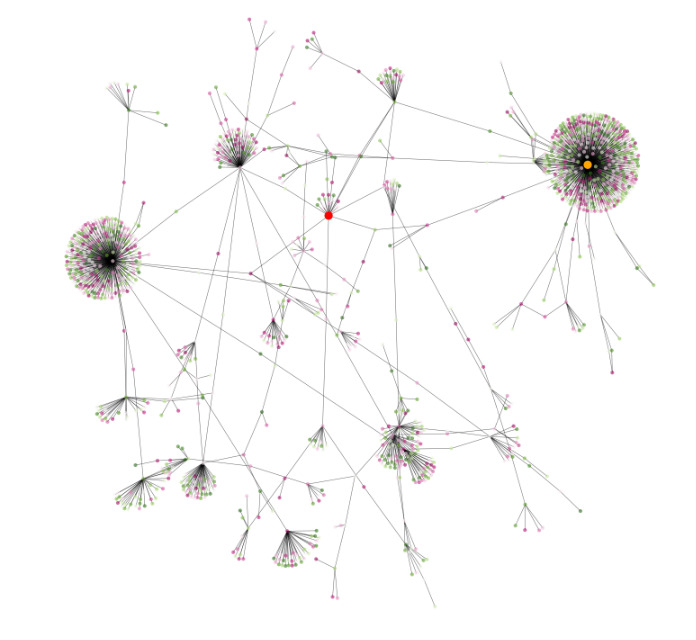

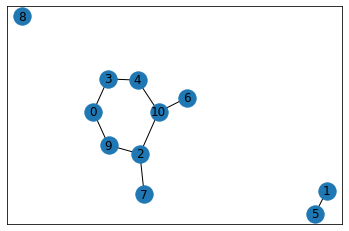

In [ ]:
 nx.draw_networkx(G)

In [ ]:
Result= nx.degree_centrality(G)

In [ ]:
print((Result))

{0: 0.2, 1: 0.1, 2: 0.30000000000000004, 3: 0.2, 4: 0.2, 5: 0.1, 6: 0.1, 7: 0.1, 8: 0.0, 9: 0.2, 10: 0.30000000000000004}


In [ ]:
a_file = open("Result.csv", "w")


writer = csv.writer(a_file)
for key, value in Result.items():
    writer.writerow([key, value])

a_file.close()

In [ ]:
import igraph
import pandas as pd


# Get the values as np.array, it's more convenenient.
#A = a.values

# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
g = igraph.Graph.Adjacency(P)



#Correltion

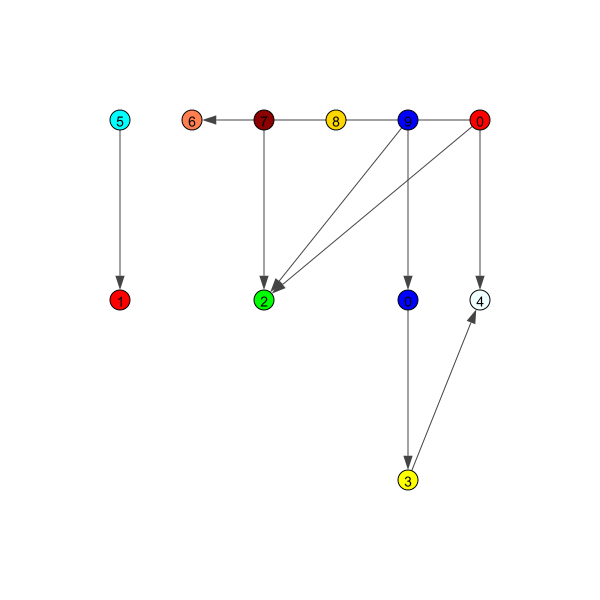

In [ ]:
igraph.plot(g, layout="rt", labels=True, margin=120,vertex_size=20,
        vertex_color=['blue', 'red', 'green', 'yellow','Azure','Aqua','Coral','darkred','gold'],
        vertex_label=['0', '1', '2', '3','4','5','6','7','8','9'])

In [ ]:
igraph.write(g,'ncol',format="ncol")

C:\ProgramData\Miniconda3\lib\site-packages\igraph\__init__.py:2989: RuntimeWarning: names attribute does not exists at src/io/ncol.c:250
  return writer(f, *args, **kwds)
C:\ProgramData\Miniconda3\lib\site-packages\igraph\__init__.py:2989: RuntimeWarning: weights attribute does not exists at src/io/ncol.c:265
  return writer(f, *args, **kwds)
